### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.5)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

import warnings
warnings.filterwarnings('ignore')


pd.options.display.max_columns= None
pd.options.display.max_rows = None

### Data Exploration

In [2]:
df = pd.read_csv("MN.csv")

In [3]:
df.head()

Borough  Block  Lot   CD  CT2010  CB2010  SchoolDist  Council  ZipCode  \
0      MN      1   10  101     5.0  1011.0         2.0      1.0  10004.0   
1      MN      1  101  101     1.0  1001.0         2.0      1.0  10004.0   
2      MN      1  201  101     1.0  1000.0         2.0      1.0  10004.0   
3      MN      1  301  101     NaN     NaN         2.0      1.0  10004.0   
4      MN      1  401  101     NaN     NaN         2.0      1.0  10004.0   

  FireComp  PolicePrct  HealthCenterDistrict  HealthArea  SanitBoro  \
0     E007         1.0                  15.0      8100.0        1.0   
1     E007         1.0                  15.0      8200.0        1.0   
2     E007         1.0                  15.0      8200.0        1.0   
3     E007         1.0                  15.0         NaN        NaN   
4     E007         1.0                  15.0         NaN        NaN   

   SanitDistrict SanitSub               Address ZoneDist1 ZoneDist2 ZoneDist3  \
0            1.0       3B    1 GOVERNORS ISLAND      R3-2       NaN       NaN   
1            1.0      NaN      1 LIBERTY ISLAND      R3-2       NaN       NaN   
2            1.0      NaN        1 ELLIS ISLAND      R3-2       NaN       NaN   
3            NaN      NaN  JOE DIMAGGIO HIGHWAY       ZNA       NaN       NaN   
4            NaN      NaN  JOE DIMAGGIO HIGHWAY       ZNA       NaN       NaN   

  ZoneDist4 Overlay1 Overlay2 SPDist1 SPDist2  SPDist3 LtdHeight SplitZone  \
0       NaN      NaN      NaN      GI     NaN      NaN       NaN         N   
1       NaN      NaN      NaN     NaN     NaN      NaN       NaN         N   
2       NaN      NaN      NaN     NaN     NaN      NaN       NaN         N   
3       NaN      NaN      NaN     NaN     NaN      NaN       NaN         N   
4       NaN      NaN      NaN     NaN     NaN      NaN       NaN         N   

  BldgClass  LandUse  Easements OwnerType              OwnerName  LotArea  \
0        Y4      8.0          0         P  GOVERNORS ISLAND CORP  7736692   
1        P7      8.0          0         X  U S GOVT LAND & BLDGS   541886   
2        Z9      NaN          0         X  U S GOVT LAND & BLDGS  2764190   
3        U0      7.0          0       NaN                    NaN        0   
4        U0      7.0          0       NaN                    NaN        0   

   BldgArea  ComArea  ResArea  OfficeArea  RetailArea  GarageArea  StrgeArea  \
0   2725731  2725731        0           0           0           0          0   
1    541886   541886        0           0           0           0          0   
2    603130   603130        0           0           0           0          0   
3         0        0        0           0           0           0          0   
4         0        0        0           0           0           0          0   

   FactryArea  OtherArea  AreaSource  NumBldgs  NumFloors  UnitsRes  \
0           0    2725731           2       159        0.0         0   
1           0     541886           2        11        0.0         0   
2           0     603130           2        13        0.0         0   
3           0          0           7         0        0.0         0   
4           0          0           7         0        0.0         0   

   UnitsTotal  LotFront  LotDepth  BldgFront  BldgDepth  Ext  ProxCode  \
0           0       0.0       0.0        0.0        0.0  NaN       0.0   
1           0     500.0    1046.0        0.0        0.0  NaN       0.0   
2           0       0.0       0.0        0.0        0.0  NaN       0.0   
3           0       0.0       0.0        0.0        0.0  NaN       0.0   
4           0       0.0       0.0        0.0        0.0  NaN       0.0   

  IrrLotCode  LotType  BsmtCode  AssessLand  AssessTot  ExemptLand  ExemptTot  \
0          N      5.0       0.0   104445450  166042350   104445450  166042350   
1          Y      5.0       0.0     4225950   13574700     4225950   13574700   
2          N      5.0       0.0    14972400  115055100    14972400  115055100   
3          N      0.0 

In [4]:
df = df[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 
         'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 
         'ZipCode', 'YCoord', 'XCoord']]

In [5]:
df.head()

Address  BldgArea  BldgDepth  BuiltFAR  CommFAR  FacilFAR  \
0    1 GOVERNORS ISLAND   2725731        0.0      0.35      0.0       1.0   
1      1 LIBERTY ISLAND    541886        0.0      1.00      0.0       1.0   
2        1 ELLIS ISLAND    603130        0.0      0.22      0.0       1.0   
3  JOE DIMAGGIO HIGHWAY         0        0.0      0.00      0.0       0.0   
4  JOE DIMAGGIO HIGHWAY         0        0.0      0.00      0.0       0.0   

   Lot  LotArea  LotDepth  NumBldgs  NumFloors  OfficeArea  ResArea  ResidFAR  \
0   10  7736692       0.0       159        0.0           0        0       0.6   
1  101   541886    1046.0        11        0.0           0        0       0.6   
2  201  2764190       0.0        13        0.0           0        0       0.6   
3  301        0       0.0         0        0.0           0        0       0.0   
4  401        0       0.0         0        0.0           0        0       0.0   

   RetailArea  YearBuilt  YearAlter1  ZipCode    YCoord    XCoord  
0           0       1900           0  10004.0  190225.0  979071.0  
1           0       1900           0  10004.0  190636.0  971677.0  
2           0       1900           0  10004.0  193648.0  972790.0  
3           0          0           0  10004.0       NaN       NaN  
4           0          0           0  10004.0       NaN       NaN

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42966 entries, 0 to 42965
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Address     42917 non-null  object 
 1   BldgArea    42966 non-null  int64  
 2   BldgDepth   42966 non-null  float64
 3   BuiltFAR    42966 non-null  float64
 4   CommFAR     42966 non-null  float64
 5   FacilFAR    42966 non-null  float64
 6   Lot         42966 non-null  int64  
 7   LotArea     42966 non-null  int64  
 8   LotDepth    42966 non-null  float64
 9   NumBldgs    42966 non-null  int64  
 10  NumFloors   42966 non-null  float64
 11  OfficeArea  42966 non-null  int64  
 12  ResArea     42966 non-null  int64  
 13  ResidFAR    42966 non-null  float64
 14  RetailArea  42966 non-null  int64  
 15  YearBuilt   42966 non-null  int64  
 16  YearAlter1  42966 non-null  int64  
 17  ZipCode     42817 non-null  float64
 18  YCoord      42219 non-null  float64
 19  XCoord      42219 non-nul

In [7]:
df.describe(include='all')

Address      BldgArea     BldgDepth      BuiltFAR       CommFAR  \
count         42917  4.296600e+04  42966.000000  42966.000000  42966.000000   
unique        42176           NaN           NaN           NaN           NaN   
top     F D R DRIVE           NaN           NaN           NaN           NaN   
freq             35           NaN           NaN           NaN           NaN   
mean            NaN  4.178398e+04     74.362966      4.241900      2.143886   
std             NaN  1.618685e+05     68.539535      5.552956      3.760848   
min             NaN  0.000000e+00      0.000000      0.000000      0.000000   
25%             NaN  4.337250e+03     51.000000      2.230000      0.000000   
50%             NaN  8.839500e+03     73.000000      3.470000      0.000000   
75%             NaN  2.285375e+04     90.000000      4.520000      3.400000   
max             NaN  1.343508e+07   9388.000000    398.430000     15.000000   

            FacilFAR           Lot       LotArea      LotDepth      NumBldgs  \
count   42966.000000  42966.000000  4.296600e+04  42966.000000  42966.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        6.419190    546.846716  1.169335e+04    105.841592      1.083741   
std         2.755945   1878.596944  2.377913e+05     81.359168      1.223349   
min         0.000000      1.000000  0.000000e+00      0.000000      0.000000   
25%         4.000000     18.000000  1.909000e+03     92.000000      1.000000   
50%         6.500000     37.000000  2.523000e+03    100.000000      1.000000   
75%         6.500000     61.000000  5.686000e+03    100.920000      1.000000   
max        15.000000   9220.000000  3.659000e+07   5000.000000    159.000000   

           NumFloors    OfficeArea       ResArea      ResidFAR    RetailArea  \
count   42966.000000  4.296600e+04  4.296600e+04  42966.000000  4.296600e+04   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        5.944808  1.078604e+04  2.095866e+04      5.022294  2.364294e+03   
std         6.301499  8.959049e+04  8.251752e+04      2.815438  1.879967e+04   
min         0.000000  0.000000e+00  0.000000e+00      0.000000  0.000000e+00   
25%         3.000000  0.000000e+00  0.000000e+00      3.440000  0.000000e+00   
50%         5.000000  0.000000e+00  4.905000e+03      4.000000  0.000000e+00   
75%         6.000000  0.000000e+00  1.163275e+04      6.020000  1.700000e+03   
max       104.000000  3.583167e+06  8.367942e+06     12.000000  2.192088e+06   

           YearBuilt    YearAlter1       ZipCode         YCoord        XCoord  
count   42966.000000  42966.000000  42817.000000   42219.000000  4.221900e+04  
unique           NaN           NaN           NaN            NaN           NaN  
top              NaN           NaN           NaN            NaN           NaN  
freq             NaN           NaN           NaN            NaN           NaN  
mean     1798.703742   1038.232765  10028.814863  220435.048533  9.924220e+05  
std       470.324203    994.001340     47.001995   14273.915498  6.559313e+03  
min         0.000000      0.000000  10001.000000  190225.000000  9.716770e+05  
25%      1900.000000      0.000000  10013.000000  207966.000000  9.868180e+05  
50%      1910.000000   1963.000000  10024.000000  219578.000000  9.918440e+05  
75%      1925.000000   1988.000000  10031.000000  231141.000000  9.984060e+05  
max      2040.000000   2017.000000  12345.000000  259321.000000  1.009741e+06

In [8]:
df.shape

(42966, 20)

In [9]:
df.columns

Index(['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR',
       'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea',
       'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1',
       'ZipCode', 'YCoord', 'XCoord'],
      dtype='object')

### Replace zero value with NaNs

In [10]:
df['Address'].value_counts()

F D R DRIVE                    35
MARGINAL STREET                27
RIVERSIDE DRIVE                22
FDR DRIVE                      20
BROADWAY                       18
ST NICHOLAS AVENUE             18
2 AVENUE                       16
7 AVENUE                       15
HARLEM RIVER DRIVE             15
12 AVENUE                      14
9 AVENUE                       13
1 AVENUE                       12
AMSTERDAM AVENUE               10
EAST 5 STREET                  10
EAST 4 STREET                  10
WEST 138 STREET                10
8 AVENUE                        9
EAST 8 STREET                   9
EAST 6 STREET                   8
EAST 112 STREET                 7
FT WASHINGTON AVENUE            7
WEST 34 STREET                  7
RIVERVIEW TERRACE               7
WEST 126 STREET                 7
11 AVENUE                       7
SOUTH STREET                    6
CABRINI BOULEVARD               6
AVENUE C                        6
WEST 135 STREET                 6
3 AVENUE      

In [11]:
df['BldgArea'].value_counts()

0           2459
3600         172
3200         128
3000         127
4000         125
5000         114
6000          98
3400          91
7500          88
2880          87
3840          70
10000         69
3360          65
4800          65
4500          60
2700          59
4400          57
2400          56
2500          55
7000          54
3800          50
9000          49
6750          46
3300          45
3520          44
3680          43
3240          43
1480          42
3328          42
4200          42
6500          41
8000          41
12000         40
3960          40
10500         39
3744          38
3456          38
5500          38
6400          38
3780          37
5600          37
3332          36
3500          35
8125          35
3700          35
4600          35
2250          34
9375          34
3120          34
2550          34
4320          34
2520          33
3900          33
5400          33
9500          33
2499          31
9750          31
3536          31
3750          

In [12]:
df['BldgArea'].replace(0,np.nan,inplace=True)

In [13]:
df['BldgDepth'].value_counts()

0.00       3989
100.00     1799
50.00      1765
60.00      1116
86.00      1071
88.00       989
90.00       930
80.00       918
85.00       915
84.00       856
70.00       824
52.00       812
87.00       765
55.00       745
75.00       720
48.00       642
82.00       614
40.00       607
54.00       597
68.00       564
45.00       559
74.00       508
65.00       505
66.00       500
72.00       489
98.00       485
78.00       481
64.00       480
92.00       473
99.00       445
58.00       444
76.00       423
95.00       418
96.00       411
83.00       407
62.00       407
56.00       390
89.00       387
94.00       386
73.00       348
67.00       344
42.00       335
46.00       325
49.00       307
69.00       293
81.00       293
53.00       292
79.00       291
71.00       282
63.00       281
77.00       271
59.00       263
93.00       261
97.00       244
44.00       236
61.00       222
57.00       215
51.00       211
91.00       202
102.00      190
200.00      186
125.00      178
43.00   

In [14]:
df['BldgDepth'].replace(0.00,np.nan,inplace=True)

In [15]:
df['BuiltFAR'].value_counts()

0.00      2653
2.00       354
1.00       317
4.00       307
3.00       229
1.50       171
3.79       166
5.00       159
3.97       152
3.88       152
3.80       145
1.98       140
3.91       139
3.75       138
3.90       138
3.77       137
3.20       135
3.98       134
4.20       133
3.96       132
3.87       132
3.89       130
3.86       130
3.84       129
4.19       129
3.44       128
3.73       128
4.16       126
2.80       125
3.26       125
3.78       124
3.51       123
3.99       123
3.85       123
4.01       122
2.99       122
3.60       121
3.39       119
4.03       119
2.40       118
3.92       118
3.82       117
3.70       117
3.81       117
3.52       116
2.08       115
3.71       115
2.38       115
3.93       114
3.95       114
3.83       114
3.94       113
1.78       111
3.41       111
3.56       111
3.72       111
3.25       110
3.68       110
2.97       109
4.07       109
3.61       109
3.47       108
2.94       107
1.99       106
4.17       105
1.88       105
2.89      

In [16]:
df['BuiltFAR'].replace(0.00,np.nan,inplace=True)

In [17]:
df['CommFAR'].value_counts()

0.0     28257
2.0      3772
6.0      3638
10.0     2488
5.0      1464
15.0     1199
4.0       790
3.4       688
12.0      452
8.0        76
1.0        74
14.0       68
Name: CommFAR, dtype: int64

In [18]:
df['CommFAR'].replace(0.0,np.nan,inplace=True)

In [19]:
df['FacilFAR'].value_counts()

6.50     16097
4.00     10801
10.00     7094
3.00      2363
4.80      1365
15.00     1199
6.00       873
7.50       624
0.00       602
12.00      452
9.00       437
7.52       320
4.20       262
2.00       132
5.00       124
8.00        76
2.40        74
14.00       68
1.00         3
Name: FacilFAR, dtype: int64

In [20]:
df['FacilFAR'].replace(0.00,np.nan,inplace=True)

In [21]:
df['Lot'].value_counts()

1       1532
7501    1165
29       730
7502     681
10       645
12       625
20       624
5        618
21       618
14       618
23       615
11       610
9        608
33       605
25       603
7        599
24       594
17       594
13       590
15       581
26       580
30       569
8        568
22       566
31       565
27       560
16       553
40       548
36       548
28       534
43       524
37       524
41       523
6        516
45       513
42       512
44       506
19       502
47       500
32       500
38       490
39       490
46       490
35       488
50       484
18       484
34       479
48       462
49       448
51       437
4        436
61       435
52       433
3        432
60       392
56       384
53       377
2        376
7503     374
59       357
57       347
58       342
55       335
54       330
63       323
62       311
64       309
65       224
66       215
69       207
7504     190
67       188
70       158
68       157
72       147
71       141
7505     108

In [22]:
df['LotArea'].value_counts()

2500        923
2523        590
2554        576
2510        463
2043        455
2008        440
0           406
2018        382
2469        319
5000        294
2498        291
2517        278
1875        266
1665        257
2000        238
2013        223
1682        215
5046        205
1699        198
10000       195
1998        195
4996        193
1600        186
2300        173
7500        156
1817        154
1975        153
2581        153
1799        150
1499        150
4000        141
1716        126
1839        108
1500        108
9992        106
2375        103
3747        102
1599        100
5021         99
3750         99
3997         98
1812         98
1800         96
1941         96
1873         96
10092        94
1615         90
1900         89
1892         88
1883         88
1840         88
1898         83
2271         82
2248         80
1917         80
2550         77
1749         76
2400         75
5108         75
4938         75
1700         74
2119         74
7569    

In [23]:
df['LotArea'].replace(0,np.nan,inplace=True)

In [24]:
df['LotDepth'].value_counts()

100.00     4793
100.92     3336
99.92      3241
100.42     2978
102.17     2881
98.75      2096
100.67     1418
75.00      1040
80.00       758
103.25      619
0.00        616
92.00       589
95.00       423
125.00      359
70.00       352
90.00       332
150.00      292
50.00       278
60.00       265
85.00       224
87.50       201
100.71      198
200.00      186
96.17       182
200.83      180
197.50      176
94.75       174
97.00       163
110.00      156
92.25       153
97.50       150
90.83       147
74.00       138
120.00      130
98.00       125
65.00       119
93.92       110
105.00      105
94.00       101
88.00        91
100.08       89
175.00       87
78.00        82
100.17       76
64.00        75
100.83       72
73.00        71
77.00        71
83.00        71
100.50       70
72.00        69
201.83       69
100.25       67
105.92       66
25.00        65
101.00       64
84.00        62
99.00        61
199.83       60
93.00        58
102.00       57
96.00        57
81.00   

In [25]:
df['LotDepth'].replace(0.00,np.nan,inplace=True)

In [26]:
df['NumBldgs'].value_counts()

1      37639
0       2254
2       2185
3        439
4        176
5         85
6         57
7         32
8         26
10        13
11        11
9         10
12         8
13         6
14         4
18         3
17         2
19         2
38         2
54         1
27         1
26         1
34         1
23         1
21         1
22         1
69         1
50         1
49         1
28         1
159        1
Name: NumBldgs, dtype: int64

In [27]:
df['NumBldgs'].replace(0,np.nan,inplace=True)

In [28]:
df['NumFloors'].value_counts()

5.00      10976
4.00       7414
3.00       6302
6.00       5370
0.00       2590
2.00       1438
7.00       1222
1.00       1046
12.00       730
8.00        552
9.00        473
16.00       396
10.00       391
13.00       360
15.00       350
14.00       318
11.00       315
20.00       230
17.00       200
19.00       171
21.00       155
3.50        144
2.50        140
18.00       135
22.00        94
4.50         94
23.00        74
26.00        69
25.00        65
24.00        64
32.00        60
31.00        59
5.50         53
30.00        51
27.00        50
35.00        45
33.00        44
2.75         42
28.00        42
42.00        40
34.00        39
29.00        36
6.50         35
36.00        34
38.00        31
40.00        28
39.00        26
41.00        24
43.00        22
37.00        21
45.00        19
1.50         18
44.00        17
48.00        14
46.00        14
51.00        13
47.00        11
50.00        11
52.00         9
54.00         9
7.50          8
73.00         8
12.50   

In [29]:
df['NumFloors'].replace(0.00,np.nan,inplace=True)

In [30]:
df['OfficeArea'].value_counts()

0          36819
1000         174
2000         142
1500          82
3000          80
800           66
500           58
4000          55
5000          55
1200          44
2500          35
600           32
6000          29
1800          26
700           25
900           23
400           23
1600          22
8000          18
4500          18
1400          18
2400          17
1100          17
7000          16
10000         15
2250          15
3500          15
3600          13
750           13
1700          12
15000         12
300           11
2800          11
30000         11
1350          10
9000          10
2200          10
1300          10
4200          10
20000          9
950            9
25000          8
7500           8
200            8
2700           8
5500           8
1250           8
12000          8
4600           8
4400           7
9200           7
3200           7
1900           7
1875           7
1625           7
5400           6
9600           6
6500           6
1125          

In [31]:
df['OfficeArea'].replace(0,np.nan,inplace=True)

In [32]:
df['ResArea'].value_counts()

0          10946
3000         161
2400         134
2700         114
3600         103
4000         100
2550          88
2250          82
2880          80
2160          78
6000          75
3300          66
2520          63
4500          55
2640          53
5000          52
9000          49
4800          49
2500          48
2000          47
3200          46
2499          45
3360          44
8000          44
2496          43
1480          42
2850          41
3240          38
10000         38
7000          38
3120          38
1800          38
3400          37
2592          36
5400          35
6200          32
2800          32
6500          32
4400          32
3960          31
2475          30
6400          29
2100          29
2652          29
5500          29
7200          28
7500          28
3744          28
2448          28
2808          28
2805          27
1000          27
6750          27
12000         27
1920          27
5600          26
1600          26
3750          26
9500          

In [33]:
df['ResArea'].replace(0,np.nan,inplace=True)

In [34]:
df['ResidFAR'].value_counts()

4.00     10837
3.44      9420
10.00     7592
6.02      5177
0.00      2906
3.00      2363
7.52      1424
2.43      1316
6.00       873
9.00       437
4.20       262
1.25       132
5.00       124
8.00        76
12.00       24
0.60         3
Name: ResidFAR, dtype: int64

In [35]:
df['ResidFAR'].replace(0.00,np.nan,inplace=True)

In [36]:
df['RetailArea'].value_counts()

0          26650
1000         657
2000         570
1500         483
1200         297
3000         257
5000         257
2500         252
4000         248
800          239
1800         202
1600         170
1400         150
10000        129
900          125
1300         120
6000         115
500          112
1700         111
600          105
1100         103
2200          99
2400          97
3500          87
4500          86
1900          85
1250          79
2300          75
700           74
7000          65
750           62
9000          62
7500          61
8000          59
2100          54
1750          51
2700          50
2600          49
3600          47
2250          45
12000         44
5500          43
1350          43
3200          41
2800          40
400           39
3400          38
4200          38
1875          37
15000         34
1050          34
1550          33
1850          32
6500          30
20000         30
11000         30
1950          29
1650          28
3700          

In [37]:
df['RetailArea'].replace(0,np.nan,inplace=True)

In [38]:
df['YearBuilt'].value_counts()

1910    8253
1900    6687
1920    5484
0       2741
1899    1777
1901    1599
1915    1261
1930    1161
1925    1050
1926     789
1905     548
1909     523
1940     458
1929     312
1927     308
1928     299
1950     279
1912     254
1924     249
1890     236
1911     224
1960     209
1923     208
1922     186
1963     176
1913     173
1906     166
2000     160
1907     159
1914     153
1921     150
1931     148
2008     146
1916     145
2005     143
1917     138
2001     134
2007     132
1962     129
2003     128
2002     121
2006     117
1964     110
1987     108
2004     105
1986     103
1880     103
1939     101
1965      99
1959      98
2015      97
1961      95
1908      95
1958      94
2013      93
2016      92
1998      92
1999      92
1938      88
2014      86
1970      85
2012      85
1902      85
1904      84
1935      82
1989      81
1985      80
1957      78
1903      78
2009      76
1988      74
1951      73
1955      72
1974      70
1980      68
2010      68
1966      67

In [39]:
df['YearBuilt'].replace(0,np.nan,inplace=True)

In [40]:
df['YearAlter1'].value_counts()

0       20547
1988     2431
1987     2318
1986     1972
1989     1510
1985     1447
1984      794
1983      588
2005      519
1980      481
1982      480
2006      420
2004      420
2008      416
2009      396
2007      370
2013      324
1981      322
2014      321
2015      318
2003      317
2012      290
1998      274
2000      273
1999      240
2011      231
1992      225
1997      209
1979      207
2016      207
1990      197
2001      195
2002      194
1996      183
1994      174
2010      172
1991      167
1993      159
1995      154
1978      145
1970      138
1960      118
1969      117
1961      116
1962      111
1968      110
1974      100
1975       97
1973       97
1972       92
1976       90
1966       86
1971       83
1967       82
1963       81
2017       79
1959       77
1965       75
1964       71
1977       71
1958       69
1957       61
1956       34
1955       33
1950       28
1954       21
1952       19
1951       16
1953       14
1940       12
1949       12
1939  

In [41]:
df['YearAlter1'].replace(0,np.nan,inplace=True)

In [42]:
df['ZipCode'].value_counts()

10027.0    2205
10011.0    2079
10014.0    1951
10003.0    1872
10024.0    1750
10002.0    1706
10013.0    1630
10031.0    1602
10029.0    1601
10025.0    1588
10035.0    1488
10016.0    1394
10009.0    1324
10128.0    1321
10023.0    1261
10028.0    1193
10021.0    1184
10012.0    1176
10030.0    1111
10022.0    1092
10019.0    1077
10065.0    1055
10036.0    1038
10001.0    1031
10032.0    1021
10026.0    1010
10033.0     782
10075.0     696
10010.0     613
10018.0     606
10034.0     551
10017.0     472
10040.0     429
10037.0     384
10038.0     357
10039.0     310
10007.0     237
10463.0     220
10004.0     119
10005.0      68
10006.0      66
10044.0      23
10069.0      22
10280.0      21
10282.0      18
10020.0      14
10105.0       7
12345.0       5
10103.0       4
10121.0       4
10281.0       4
10123.0       3
10106.0       2
10278.0       2
10176.0       1
10175.0       1
10152.0       1
10174.0       1
10170.0       1
10169.0       1
10165.0       1
10158.0       1
10155.0 

In [43]:
df['YCoord'].value_counts()

208268.0    10
207836.0     9
204047.0     8
222352.0     7
208046.0     7
208138.0     7
204185.0     6
208492.0     6
232060.0     6
204889.0     6
208141.0     6
216491.0     6
222565.0     6
217675.0     6
201341.0     6
208267.0     6
208377.0     6
208360.0     6
201134.0     6
232554.0     6
222193.0     6
206799.0     6
216970.0     6
210451.0     6
207841.0     5
206041.0     5
206058.0     5
231024.0     5
233928.0     5
211080.0     5
232404.0     5
220475.0     5
222102.0     5
200467.0     5
208359.0     5
199976.0     5
223422.0     5
204698.0     5
200853.0     5
201440.0     5
207230.0     5
239034.0     5
231457.0     5
208349.0     5
208357.0     5
221766.0     5
208064.0     5
211957.0     5
228340.0     5
202520.0     5
226086.0     5
227747.0     5
232749.0     5
202573.0     5
217644.0     5
218652.0     5
204275.0     5
203715.0     5
212511.0     5
207077.0     5
208455.0     5
207030.0     5
210594.0     5
223119.0     5
222851.0     5
221530.0     5
221617.0  

In [44]:
df['XCoord'].value_counts()

994500.0     9
999005.0     9
999042.0     9
987073.0     8
983120.0     8
990520.0     8
987281.0     8
987162.0     8
992633.0     8
983228.0     8
999780.0     8
999258.0     8
986832.0     8
986681.0     8
990251.0     8
999819.0     8
999402.0     8
998161.0     8
998128.0     8
1000223.0    8
996942.0     8
985118.0     8
997191.0     8
999725.0     8
985360.0     8
990244.0     8
990089.0     8
983344.0     8
999052.0     8
989689.0     8
999027.0     8
998967.0     8
998950.0     8
999050.0     8
999681.0     7
985223.0     7
984378.0     7
1000057.0    7
999731.0     7
998300.0     7
999546.0     7
983350.0     7
998077.0     7
998890.0     7
999114.0     7
997887.0     7
1000319.0    7
999116.0     7
997688.0     7
997645.0     7
982861.0     7
998478.0     7
998531.0     7
998606.0     7
998859.0     7
999673.0     7
983918.0     7
982535.0     7
983638.0     7
983913.0     7
983539.0     7
983957.0     7
984143.0     7
998791.0     7
998767.0     7
998895.0     7
983809.0  

### Treat Missing Values

In [45]:
df.isnull().sum()

Address          49
BldgArea       2459
BldgDepth      3989
BuiltFAR       2653
CommFAR       28257
FacilFAR        602
Lot               0
LotArea         406
LotDepth        616
NumBldgs       2254
NumFloors      2590
OfficeArea    36819
ResArea       10946
ResidFAR       2906
RetailArea    26650
YearBuilt      2741
YearAlter1    20547
ZipCode         149
YCoord          747
XCoord          747
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42966 entries, 0 to 42965
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Address     42917 non-null  object 
 1   BldgArea    40507 non-null  float64
 2   BldgDepth   38977 non-null  float64
 3   BuiltFAR    40313 non-null  float64
 4   CommFAR     14709 non-null  float64
 5   FacilFAR    42364 non-null  float64
 6   Lot         42966 non-null  int64  
 7   LotArea     42560 non-null  float64
 8   LotDepth    42350 non-null  float64
 9   NumBldgs    40712 non-null  float64
 10  NumFloors   40376 non-null  float64
 11  OfficeArea  6147 non-null   float64
 12  ResArea     32020 non-null  float64
 13  ResidFAR    40060 non-null  float64
 14  RetailArea  16316 non-null  float64
 15  YearBuilt   40225 non-null  float64
 16  YearAlter1  22419 non-null  float64
 17  ZipCode     42817 non-null  float64
 18  YCoord      42219 non-null  float64
 19  XCoord      42219 non-nul

In [47]:
imputer = mdi.MeanMedianImputer(imputation_method='median',variables=None)

In [48]:
imputer.fit(df)

MeanMedianImputer(imputation_method='median',
                  variables=['BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR',
                             'FacilFAR', 'Lot', 'LotArea', 'LotDepth',
                             'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea',
                             'ResidFAR', 'RetailArea', 'YearBuilt',
                             'YearAlter1', 'ZipCode', 'YCoord', 'XCoord'])

In [49]:
df = imputer.transform(df)

In [50]:
df.isnull().sum()

Address       49
BldgArea       0
BldgDepth      0
BuiltFAR       0
CommFAR        0
FacilFAR       0
Lot            0
LotArea        0
LotDepth       0
NumBldgs       0
NumFloors      0
OfficeArea     0
ResArea        0
ResidFAR       0
RetailArea     0
YearBuilt      0
YearAlter1     0
ZipCode        0
YCoord         0
XCoord         0
dtype: int64

### Change data type

In [51]:
df.dtypes

Address        object
BldgArea      float64
BldgDepth     float64
BuiltFAR      float64
CommFAR       float64
FacilFAR      float64
Lot             int64
LotArea       float64
LotDepth      float64
NumBldgs      float64
NumFloors     float64
OfficeArea    float64
ResArea       float64
ResidFAR      float64
RetailArea    float64
YearBuilt     float64
YearAlter1    float64
ZipCode       float64
YCoord        float64
XCoord        float64
dtype: object

### Load 311 dataset

In [52]:
df2 = pd.read_csv("allcomplaints.csv")

In [53]:
df2.head()

ComplaintType  Zipcode              Street    Borough
0        HEAT/HOT WATER  10019.0    WEST   52 STREET  MANHATTAN
1  UNSANITARY CONDITION  11204.0           67 STREET   BROOKLYN
2        HEAT/HOT WATER  11372.0           37 AVENUE     QUEENS
3        HEAT/HOT WATER  10458.0  SOUTHERN BOULEVARD      BRONX
4             APPLIANCE  11209.0           78 STREET   BROOKLYN

In [54]:
df2.shape

(5119327, 4)

In [55]:
df2['Borough'].value_counts()

BROOKLYN         1731202
BRONX            1609837
MANHATTAN        1049360
QUEENS            641741
STATEN ISLAND      87187
Name: Borough, dtype: int64

In [56]:
df3 = df2[df2['Borough'] == 'MANHATTAN']

In [57]:
df3.head()

ComplaintType  Zipcode                        Street    Borough
0   HEAT/HOT WATER  10019.0              WEST   52 STREET  MANHATTAN
11  HEAT/HOT WATER  10039.0  FREDERICK DOUGLASS BOULEVARD  MANHATTAN
15  HEAT/HOT WATER  10011.0              WEST   22 STREET  MANHATTAN
17  HEAT/HOT WATER  10026.0            CENTRAL PARK NORTH  MANHATTAN
18  HEAT/HOT WATER  10031.0              WEST  151 STREET  MANHATTAN

In [58]:
df3.shape

(1049360, 4)

In [59]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049360 entries, 0 to 5119326
Data columns (total 4 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   ComplaintType  1049360 non-null  object 
 1   Zipcode        1049360 non-null  float64
 2   Street         1049360 non-null  object 
 3   Borough        1049360 non-null  object 
dtypes: float64(1), object(3)
memory usage: 40.0+ MB


In [60]:
df3.head()

ComplaintType  Zipcode                        Street    Borough
0   HEAT/HOT WATER  10019.0              WEST   52 STREET  MANHATTAN
11  HEAT/HOT WATER  10039.0  FREDERICK DOUGLASS BOULEVARD  MANHATTAN
15  HEAT/HOT WATER  10011.0              WEST   22 STREET  MANHATTAN
17  HEAT/HOT WATER  10026.0            CENTRAL PARK NORTH  MANHATTAN
18  HEAT/HOT WATER  10031.0              WEST  151 STREET  MANHATTAN

In [61]:
df3.reset_index(drop=True,inplace=True)

In [62]:
df3.head()

ComplaintType  Zipcode                        Street    Borough
0  HEAT/HOT WATER  10019.0              WEST   52 STREET  MANHATTAN
1  HEAT/HOT WATER  10039.0  FREDERICK DOUGLASS BOULEVARD  MANHATTAN
2  HEAT/HOT WATER  10011.0              WEST   22 STREET  MANHATTAN
3  HEAT/HOT WATER  10026.0            CENTRAL PARK NORTH  MANHATTAN
4  HEAT/HOT WATER  10031.0              WEST  151 STREET  MANHATTAN

In [63]:
df.shape

(42966, 20)

In [64]:
df4 = df3.sample(n=42966, random_state=0)

In [65]:
df4.head()

ComplaintType  Zipcode                   Street    Borough
426068         PLUMBING  10026.0  ADAM C POWELL BOULEVARD  MANHATTAN
1018099        PLUMBING  10032.0     FT WASHINGTON AVENUE  MANHATTAN
510333   HEAT/HOT WATER  10019.0         WEST   51 STREET  MANHATTAN
491420   HEAT/HOT WATER  10032.0          WEST 167 STREET  MANHATTAN
792644    PAINT/PLASTER  10027.0         AMSTERDAM AVENUE  MANHATTAN

In [66]:
df4.reset_index(drop=True,inplace=True)

In [67]:
df4.head()

ComplaintType  Zipcode                   Street    Borough
0        PLUMBING  10026.0  ADAM C POWELL BOULEVARD  MANHATTAN
1        PLUMBING  10032.0     FT WASHINGTON AVENUE  MANHATTAN
2  HEAT/HOT WATER  10019.0         WEST   51 STREET  MANHATTAN
3  HEAT/HOT WATER  10032.0          WEST 167 STREET  MANHATTAN
4   PAINT/PLASTER  10027.0         AMSTERDAM AVENUE  MANHATTAN

In [68]:
df5 = pd.concat([df,df4],axis=1)

In [69]:
df5.head()

Address   BldgArea  BldgDepth  BuiltFAR  CommFAR  FacilFAR  \
0    1 GOVERNORS ISLAND  2725731.0       77.0      0.35      6.0       1.0   
1      1 LIBERTY ISLAND   541886.0       77.0      1.00      6.0       1.0   
2        1 ELLIS ISLAND   603130.0       77.0      0.22      6.0       1.0   
3  JOE DIMAGGIO HIGHWAY     9401.0       77.0      3.60      6.0       6.5   
4  JOE DIMAGGIO HIGHWAY     9401.0       77.0      3.60      6.0       6.5   

   Lot    LotArea  LotDepth  NumBldgs  NumFloors  OfficeArea  ResArea  \
0   10  7736692.0     100.0     159.0        5.0      6072.0   7650.0   
1  101   541886.0    1046.0      11.0        5.0      6072.0   7650.0   
2  201  2764190.0     100.0      13.0        5.0      6072.0   7650.0   
3  301     2523.0     100.0       1.0        5.0      6072.0   7650.0   
4  401     2523.0     100.0       1.0        5.0      6072.0   7650.0   

   ResidFAR  RetailArea  YearBuilt  YearAlter1  ZipCode    YCoord    XCoord  \
0       0.6      2320.0     1900.0      1988.0  10004.0  190225.0  979071.0   
1       0.6      2320.0     1900.0      1988.0  10004.0  190636.0  971677.0   
2       0.6      2320.0     1900.0      1988.0  10004.0  193648.0  972790.0   
3       4.0      2320.0     1910.0      1988.0  10004.0  219578.0  991844.0   
4       4.0      2320.0     1910.0      1988.0  10004.0  219578.0  991844.0   

    ComplaintType  Zipcode                   Street    Borough  
0        PLUMBING  10026.0  ADAM C POWELL BOULEVARD  MANHATTAN  
1        PLUMBING  10032.0     FT WASHINGTON AVENUE  MANHATTAN  
2  HEAT/HOT WATER  10019.0         WEST   51 STREET  MANHATTAN  
3  HEAT/HOT WATER  10032.0          WEST 167 STREET  MANHATTAN  
4   PAINT/PLASTER  10027.0         AMSTERDAM AVENUE  MANHATTAN

In [70]:
df5.shape

(42966, 24)

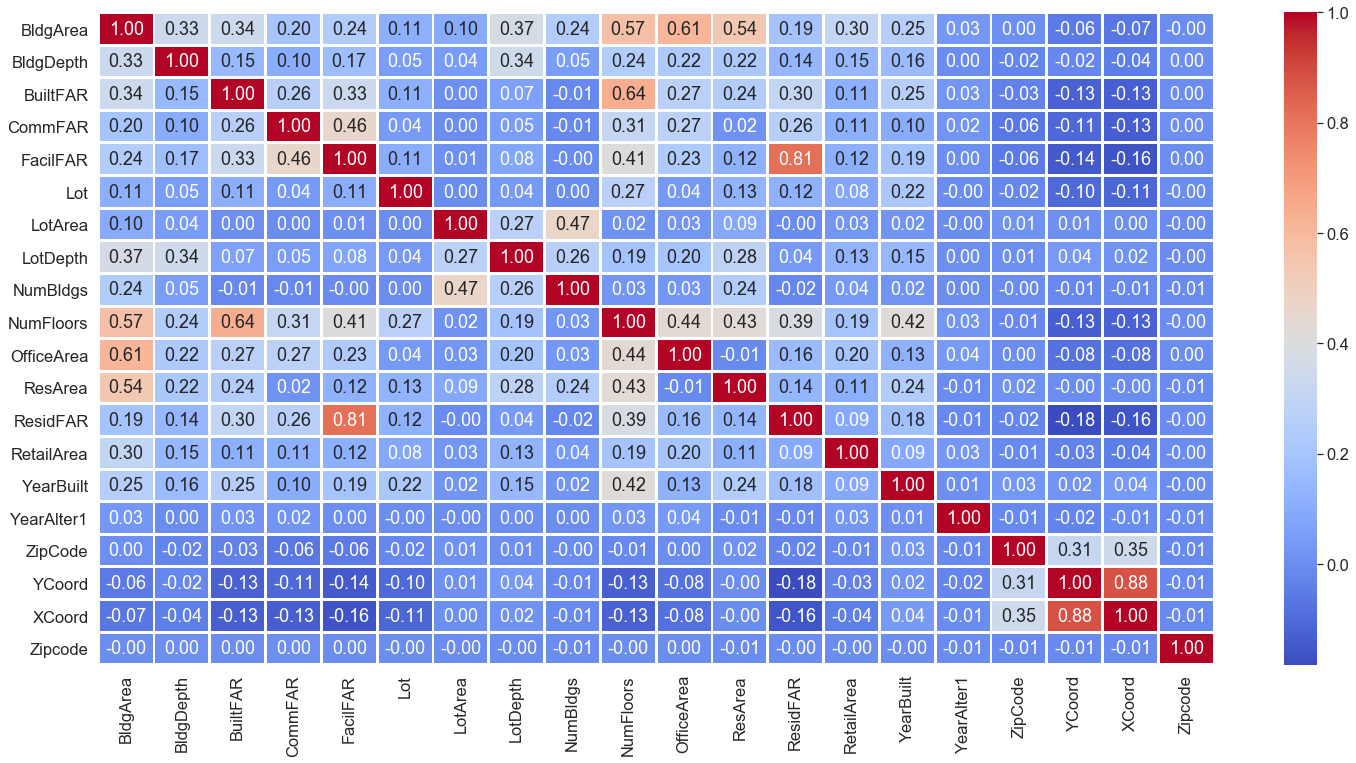

In [71]:
plt.figure(figsize=(25,12))
sns.heatmap(df5.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

### Treat Duplicate Values

In [72]:
df5.duplicated(keep='first').sum()

0

### Feature Engineering

In [73]:
df5['Age'] = df5['YearAlter1'] - df5['YearBuilt']

In [74]:
df5.head()

Address   BldgArea  BldgDepth  BuiltFAR  CommFAR  FacilFAR  \
0    1 GOVERNORS ISLAND  2725731.0       77.0      0.35      6.0       1.0   
1      1 LIBERTY ISLAND   541886.0       77.0      1.00      6.0       1.0   
2        1 ELLIS ISLAND   603130.0       77.0      0.22      6.0       1.0   
3  JOE DIMAGGIO HIGHWAY     9401.0       77.0      3.60      6.0       6.5   
4  JOE DIMAGGIO HIGHWAY     9401.0       77.0      3.60      6.0       6.5   

   Lot    LotArea  LotDepth  NumBldgs  NumFloors  OfficeArea  ResArea  \
0   10  7736692.0     100.0     159.0        5.0      6072.0   7650.0   
1  101   541886.0    1046.0      11.0        5.0      6072.0   7650.0   
2  201  2764190.0     100.0      13.0        5.0      6072.0   7650.0   
3  301     2523.0     100.0       1.0        5.0      6072.0   7650.0   
4  401     2523.0     100.0       1.0        5.0      6072.0   7650.0   

   ResidFAR  RetailArea  YearBuilt  YearAlter1  ZipCode    YCoord    XCoord  \
0       0.6      2320.0     1900.0      1988.0  10004.0  190225.0  979071.0   
1       0.6      2320.0     1900.0      1988.0  10004.0  190636.0  971677.0   
2       0.6      2320.0     1900.0      1988.0  10004.0  193648.0  972790.0   
3       4.0      2320.0     1910.0      1988.0  10004.0  219578.0  991844.0   
4       4.0      2320.0     1910.0      1988.0  10004.0  219578.0  991844.0   

    ComplaintType  Zipcode                   Street    Borough   Age  
0        PLUMBING  10026.0  ADAM C POWELL BOULEVARD  MANHATTAN  88.0  
1        PLUMBING  10032.0     FT WASHINGTON AVENUE  MANHATTAN  88.0  
2  HEAT/HOT WATER  10019.0         WEST   51 STREET  MANHATTAN  88.0  
3  HEAT/HOT WATER  10032.0          WEST 167 STREET  MANHATTAN  78.0  
4   PAINT/PLASTER  10027.0         AMSTERDAM AVENUE  MANHATTAN  78.0

In [75]:
df5['Period'] = 2020 - df5['YearBuilt']

In [76]:
df5.head()

Address   BldgArea  BldgDepth  BuiltFAR  CommFAR  FacilFAR  \
0    1 GOVERNORS ISLAND  2725731.0       77.0      0.35      6.0       1.0   
1      1 LIBERTY ISLAND   541886.0       77.0      1.00      6.0       1.0   
2        1 ELLIS ISLAND   603130.0       77.0      0.22      6.0       1.0   
3  JOE DIMAGGIO HIGHWAY     9401.0       77.0      3.60      6.0       6.5   
4  JOE DIMAGGIO HIGHWAY     9401.0       77.0      3.60      6.0       6.5   

   Lot    LotArea  LotDepth  NumBldgs  NumFloors  OfficeArea  ResArea  \
0   10  7736692.0     100.0     159.0        5.0      6072.0   7650.0   
1  101   541886.0    1046.0      11.0        5.0      6072.0   7650.0   
2  201  2764190.0     100.0      13.0        5.0      6072.0   7650.0   
3  301     2523.0     100.0       1.0        5.0      6072.0   7650.0   
4  401     2523.0     100.0       1.0        5.0      6072.0   7650.0   

   ResidFAR  RetailArea  YearBuilt  YearAlter1  ZipCode    YCoord    XCoord  \
0       0.6      2320.0     1900.0      1988.0  10004.0  190225.0  979071.0   
1       0.6      2320.0     1900.0      1988.0  10004.0  190636.0  971677.0   
2       0.6      2320.0     1900.0      1988.0  10004.0  193648.0  972790.0   
3       4.0      2320.0     1910.0      1988.0  10004.0  219578.0  991844.0   
4       4.0      2320.0     1910.0      1988.0  10004.0  219578.0  991844.0   

    ComplaintType  Zipcode                   Street    Borough   Age  Period  
0        PLUMBING  10026.0  ADAM C POWELL BOULEVARD  MANHATTAN  88.0   120.0  
1        PLUMBING  10032.0     FT WASHINGTON AVENUE  MANHATTAN  88.0   120.0  
2  HEAT/HOT WATER  10019.0         WEST   51 STREET  MANHATTAN  88.0   120.0  
3  HEAT/HOT WATER  10032.0          WEST 167 STREET  MANHATTAN  78.0   110.0  
4   PAINT/PLASTER  10027.0         AMSTERDAM AVENUE  MANHATTAN  78.0   110.0

### Drop unwanted features

In [77]:
df5.columns

Index(['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR',
       'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea',
       'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1',
       'ZipCode', 'YCoord', 'XCoord', 'ComplaintType', 'Zipcode', 'Street',
       'Borough', 'Age', 'Period'],
      dtype='object')

In [78]:
df5.drop(['Zipcode', 'Street', 'Borough', 'Address','Lot','YearBuilt', 'YearAlter1', 
          'ZipCode','YCoord', 'XCoord'],axis=1,inplace=True)

In [79]:
df5.head()

BldgArea  BldgDepth  BuiltFAR  CommFAR  FacilFAR    LotArea  LotDepth  \
0  2725731.0       77.0      0.35      6.0       1.0  7736692.0     100.0   
1   541886.0       77.0      1.00      6.0       1.0   541886.0    1046.0   
2   603130.0       77.0      0.22      6.0       1.0  2764190.0     100.0   
3     9401.0       77.0      3.60      6.0       6.5     2523.0     100.0   
4     9401.0       77.0      3.60      6.0       6.5     2523.0     100.0   

   NumBldgs  NumFloors  OfficeArea  ResArea  ResidFAR  RetailArea  \
0     159.0        5.0      6072.0   7650.0       0.6      2320.0   
1      11.0        5.0      6072.0   7650.0       0.6      2320.0   
2      13.0        5.0      6072.0   7650.0       0.6      2320.0   
3       1.0        5.0      6072.0   7650.0       4.0      2320.0   
4       1.0        5.0      6072.0   7650.0       4.0      2320.0   

    ComplaintType   Age  Period  
0        PLUMBING  88.0   120.0  
1        PLUMBING  88.0   120.0  
2  HEAT/HOT WATER  88.0   120.0  
3  HEAT/HOT WATER  78.0   110.0  
4   PAINT/PLASTER  78.0   110.0

### Treat Outliers

In [80]:
df5.columns

Index(['BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'LotArea',
       'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea',
       'ResidFAR', 'RetailArea', 'ComplaintType', 'Age', 'Period'],
      dtype='object')

In [81]:
df5.describe(include='all')

BldgArea     BldgDepth      BuiltFAR       CommFAR      FacilFAR  \
count   4.296600e+04  42966.000000  42966.000000  42966.000000  42966.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    4.232201e+04     81.511711      4.464187      6.089843      6.510262   
std     1.617443e+05     64.294632      5.449796      2.308587      2.647579   
min     1.000000e+00      1.000000      0.010000      1.000000      1.000000   
25%     5.126250e+03     59.000000      2.570000      6.000000      4.000000   
50%     9.401000e+03     77.000000      3.600000      6.000000      6.500000   
75%     2.285375e+04     90.000000      4.520000      6.000000      6.500000   
max     1.343508e+07   9388.000000    398.430000     15.000000     15.000000   

             LotArea      LotDepth      NumBldgs     NumFloors    OfficeArea  \
count   4.296600e+04  42966.000000  42966.000000  42966.000000  4.296600e+04   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    1.171719e+04    107.275283      1.136201      6.246210  1.598934e+04   
std     2.377903e+05     80.356304      1.196906      6.127109  8.898724e+04   
min     1.000000e+00      0.420000      1.000000      1.000000  6.300000e+01   
25%     1.934000e+03     92.250000      1.000000      4.000000  6.072000e+03   
50%     2.523000e+03    100.000000      1.000000      5.000000  6.072000e+03   
75%     5.686000e+03    100.920000      1.000000      6.000000  6.072000e+03   
max     3.659000e+07   5000.000000    159.000000    104.000000  3.583167e+06   

             ResArea      ResidFAR    RetailArea   ComplaintType  \
count   4.296600e+04  42966.000000  4.296600e+04           42966   
unique           NaN           NaN           NaN              15   
top              NaN           NaN           NaN  HEAT/HOT WATER   
freq             NaN           NaN           NaN           17046   
mean    2.290757e+04      5.292834  3.803293e+03             NaN   
std     8.208871e+04      2.493624  1.865183e+04             NaN   
min     2.100000e+02      0.600000  3.500000e+01             NaN   
25%     5.000000e+03      3.440000  2.320000e+03             NaN   
50%     7.650000e+03      4.000000  2.320000e+03             NaN   
75%     1.163275e+04      6.020000  2.320000e+03             NaN   
max     8.367942e+06     12.000000  2.192088e+06             NaN   

                 Age        Period  
count   42966.000000  42966.000000  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean       68.373365     99.448517  
std        28.957258     27.314187  
min       -65.000000    -20.000000  
25%        62.000000     95.000000  
50%        78.000000    110.000000  
75%        87.000000    118.000000  
max       223.000000    255.000000

In [82]:
windsorizer = Winsorizer(distribution='skewed',tail='right',fold=3.0,
                         variables=None)

In [83]:
windsorizer.fit(df5)

Winsorizer(distribution='skewed', fold=3.0, tail='right',
           variables=['BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR',
                      'FacilFAR', 'LotArea', 'LotDepth', 'NumBldgs',
                      'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR',
                      'RetailArea', 'Age', 'Period'])

In [84]:
df6 = windsorizer.transform(df5)

In [85]:
df6.head()

BldgArea  BldgDepth  BuiltFAR  CommFAR  FacilFAR  LotArea  LotDepth  \
0  76036.25       77.0      0.35      6.0       1.0  16942.0    100.00   
1  76036.25       77.0      1.00      6.0       1.0  16942.0    126.93   
2  76036.25       77.0      0.22      6.0       1.0  16942.0    100.00   
3   9401.00       77.0      3.60      6.0       6.5   2523.0    100.00   
4   9401.00       77.0      3.60      6.0       6.5   2523.0    100.00   

   NumBldgs  NumFloors  OfficeArea  ResArea  ResidFAR  RetailArea  \
0       1.0        5.0      6072.0   7650.0       0.6      2320.0   
1       1.0        5.0      6072.0   7650.0       0.6      2320.0   
2       1.0        5.0      6072.0   7650.0       0.6      2320.0   
3       1.0        5.0      6072.0   7650.0       4.0      2320.0   
4       1.0        5.0      6072.0   7650.0       4.0      2320.0   

    ComplaintType   Age  Period  
0        PLUMBING  88.0   120.0  
1        PLUMBING  88.0   120.0  
2  HEAT/HOT WATER  88.0   120.0  
3  HEAT/HOT WATER  78.0   110.0  
4   PAINT/PLASTER  78.0   110.0

In [86]:
df6.describe()

BldgArea     BldgDepth      BuiltFAR       CommFAR      FacilFAR  \
count  42966.000000  42966.000000  42966.000000  42966.000000  42966.000000   
mean   20419.072982     79.070547      4.065185      5.527748      6.482356   
std    23807.515532     29.811804      2.368396      1.200241      2.561829   
min        1.000000      1.000000      0.010000      1.000000      1.000000   
25%     5126.250000     59.000000      2.570000      6.000000      4.000000   
50%     9401.000000     77.000000      3.600000      6.000000      6.500000   
75%    22853.750000     90.000000      4.520000      6.000000      6.500000   
max    76036.250000    183.000000     10.370000      6.000000     14.000000   

            LotArea      LotDepth  NumBldgs     NumFloors    OfficeArea  \
count  42966.000000  42966.000000   42966.0  42966.000000  42966.000000   
mean    4891.865242     96.355987       1.0      5.376650   5803.209282   
std     4702.458014     18.801581       0.0      2.699914   1050.003708   
min        1.000000      0.420000       1.0      1.000000     63.000000   
25%     1934.000000     92.250000       1.0      4.000000   6072.000000   
50%     2523.000000    100.000000       1.0      5.000000   6072.000000   
75%     5686.000000    100.920000       1.0      6.000000   6072.000000   
max    16942.000000    126.930000       1.0     12.000000   6072.000000   

            ResArea      ResidFAR    RetailArea           Age        Period  
count  42966.000000  42966.000000  42966.000000  42966.000000  42966.000000  
mean   10910.841177      5.292834   2145.870758     68.347298     99.421077  
std     9228.543231      2.493624    420.083751     28.857803     27.209768  
min      210.000000      0.600000     35.000000    -65.000000    -20.000000  
25%     5000.000000      3.440000   2320.000000     62.000000     95.000000  
50%     7650.000000      4.000000   2320.000000     78.000000    110.000000  
75%    11632.750000      6.020000   2320.000000     87.000000    118.000000  
max    31531.000000     12.000000   2320.000000    162.000000    187.000000

In [87]:
windsorizer.left_tail_caps_

{}

In [88]:
windsorizer.right_tail_caps_

{'BldgArea': 76036.25,
 'BldgDepth': 183.0,
 'BuiltFAR': 10.37,
 'CommFAR': 6.0,
 'FacilFAR': 14.0,
 'LotArea': 16942.0,
 'LotDepth': 126.93,
 'NumBldgs': 1.0,
 'NumFloors': 12.0,
 'OfficeArea': 6072.0,
 'ResArea': 31531.0,
 'ResidFAR': 13.759999999999998,
 'RetailArea': 2320.0,
 'Age': 162.0,
 'Period': 187.0}

### Predict top 5 311 Problems (HEAT/HOT WATER, PAINT/PLASTER, PLUMBING, UNSANITARY CONDITION ). Create a new category called Others

In [89]:
df6['ComplaintType'].value_counts()

HEAT/HOT WATER          17046
PAINT/PLASTER            4721
PLUMBING                 4588
UNSANITARY CONDITION     3560
GENERAL CONSTRUCTION     2515
GENERAL                  1778
DOOR/WINDOW              1763
ELECTRIC                 1750
WATER LEAK               1556
NONCONST                 1246
FLOORING/STAIRS          1210
APPLIANCE                 729
SAFETY                    385
ELEVATOR                   62
OUTSIDE BUILDING           57
Name: ComplaintType, dtype: int64

In [90]:
df6.replace(to_replace='GENERAL CONSTRUCTION',value='OTHERS',inplace=True)

In [91]:
df6.replace(to_replace='ELECTRIC',value='OTHERS',inplace=True)

In [92]:
df6.replace(to_replace='DOOR/WINDOW',value='OTHERS',inplace=True)

In [93]:
df6.replace(to_replace='WATER LEAK',value='OTHERS',inplace=True)

In [94]:
df6.replace(to_replace='NONCONST',value='OTHERS',inplace=True)

In [95]:
df6.replace(to_replace='FLOORING/STAIRS',value='OTHERS',inplace=True)

In [96]:
df6.replace(to_replace='GENERAL',value='OTHERS',inplace=True)

In [97]:
df6.replace(to_replace='APPLIANCE',value='OTHERS',inplace=True)

In [98]:
df6.replace(to_replace='SAFETY',value='OTHERS',inplace=True)

In [99]:
df6.replace(to_replace='ELEVATOR',value='OTHERS',inplace=True)

In [100]:
df6.replace(to_replace='OUTSIDE BUILDING',value='OTHERS',inplace=True)

In [101]:
df6.replace(to_replace='STRUCTURAL',value='OTHERS',inplace=True)

In [102]:
df6.replace(to_replace='VACANT APARTMENT',value='OTHERS',inplace=True)

In [103]:
df6['ComplaintType'].value_counts()

HEAT/HOT WATER          17046
OTHERS                  13051
PAINT/PLASTER            4721
PLUMBING                 4588
UNSANITARY CONDITION     3560
Name: ComplaintType, dtype: int64

In [104]:
df6.head()

BldgArea  BldgDepth  BuiltFAR  CommFAR  FacilFAR  LotArea  LotDepth  \
0  76036.25       77.0      0.35      6.0       1.0  16942.0    100.00   
1  76036.25       77.0      1.00      6.0       1.0  16942.0    126.93   
2  76036.25       77.0      0.22      6.0       1.0  16942.0    100.00   
3   9401.00       77.0      3.60      6.0       6.5   2523.0    100.00   
4   9401.00       77.0      3.60      6.0       6.5   2523.0    100.00   

   NumBldgs  NumFloors  OfficeArea  ResArea  ResidFAR  RetailArea  \
0       1.0        5.0      6072.0   7650.0       0.6      2320.0   
1       1.0        5.0      6072.0   7650.0       0.6      2320.0   
2       1.0        5.0      6072.0   7650.0       0.6      2320.0   
3       1.0        5.0      6072.0   7650.0       4.0      2320.0   
4       1.0        5.0      6072.0   7650.0       4.0      2320.0   

    ComplaintType   Age  Period  
0        PLUMBING  88.0   120.0  
1        PLUMBING  88.0   120.0  
2  HEAT/HOT WATER  88.0   120.0  
3  HEAT/HOT WATER  78.0   110.0  
4   PAINT/PLASTER  78.0   110.0

In [105]:
encoder = LabelEncoder()

In [106]:
df6['ComplaintType'] = encoder.fit_transform(df6['ComplaintType'])

In [107]:
df6['ComplaintType'].value_counts()

0    17046
1    13051
2     4721
3     4588
4     3560
Name: ComplaintType, dtype: int64

In [108]:
df6.head()

BldgArea  BldgDepth  BuiltFAR  CommFAR  FacilFAR  LotArea  LotDepth  \
0  76036.25       77.0      0.35      6.0       1.0  16942.0    100.00   
1  76036.25       77.0      1.00      6.0       1.0  16942.0    126.93   
2  76036.25       77.0      0.22      6.0       1.0  16942.0    100.00   
3   9401.00       77.0      3.60      6.0       6.5   2523.0    100.00   
4   9401.00       77.0      3.60      6.0       6.5   2523.0    100.00   

   NumBldgs  NumFloors  OfficeArea  ResArea  ResidFAR  RetailArea  \
0       1.0        5.0      6072.0   7650.0       0.6      2320.0   
1       1.0        5.0      6072.0   7650.0       0.6      2320.0   
2       1.0        5.0      6072.0   7650.0       0.6      2320.0   
3       1.0        5.0      6072.0   7650.0       4.0      2320.0   
4       1.0        5.0      6072.0   7650.0       4.0      2320.0   

   ComplaintType   Age  Period  
0              3  88.0   120.0  
1              3  88.0   120.0  
2              0  88.0   120.0  
3              0  78.0   110.0  
4              2  78.0   110.0

### HEAT/HOT WATER = 0; OTHERS = 1; PAINT/PLASTER = 2; PLUMBING = 3; UNSANITARY CONDITION = 4

In [109]:
df6.columns

Index(['BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'LotArea',
       'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea',
       'ResidFAR', 'RetailArea', 'ComplaintType', 'Age', 'Period'],
      dtype='object')

In [110]:
df6 = df6[['BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR',
       'FacilFAR', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors',
       'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'Age', 'Period','ComplaintType']]

In [111]:
df6.head()

BldgArea  BldgDepth  BuiltFAR  CommFAR  FacilFAR  LotArea  LotDepth  \
0  76036.25       77.0      0.35      6.0       1.0  16942.0    100.00   
1  76036.25       77.0      1.00      6.0       1.0  16942.0    126.93   
2  76036.25       77.0      0.22      6.0       1.0  16942.0    100.00   
3   9401.00       77.0      3.60      6.0       6.5   2523.0    100.00   
4   9401.00       77.0      3.60      6.0       6.5   2523.0    100.00   

   NumBldgs  NumFloors  OfficeArea  ResArea  ResidFAR  RetailArea   Age  \
0       1.0        5.0      6072.0   7650.0       0.6      2320.0  88.0   
1       1.0        5.0      6072.0   7650.0       0.6      2320.0  88.0   
2       1.0        5.0      6072.0   7650.0       0.6      2320.0  88.0   
3       1.0        5.0      6072.0   7650.0       4.0      2320.0  78.0   
4       1.0        5.0      6072.0   7650.0       4.0      2320.0  78.0   

   Period  ComplaintType  
0   120.0              3  
1   120.0              3  
2   120.0              0  
3   110.0              0  
4   110.0              2

### Create and save processed dataset

In [112]:
#df6.to_csv("manhattanclasstrain.csv",index=False)